# Going Live with Algo Trading

In [2]:
# Initial imports
import os
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv

# Load .env environment variables
load_dotenv()

True

## Alpaca Example
**Note**: You'll need to use your own API and Secret key here to run this code. (You can do so for free at the [Alpaca Trading](https://alpaca.markets/) website).

[alpaca-trade-api ](https://github.com/alpacahq/alpaca-trade-api-python) is a python package that can be used to trade algorithmically through [Alpaca](https://alpaca.markets/), a U.S. equities broker.

In [3]:
import alpaca_trade_api as tradeapi

API_KEY = os.getenv("ALPACA_API_KEY")
API_SECRET_KEY = os.getenv("ALPACA_SECRET_KEY")
ALPACA_API_BASE_URL = "https://paper-api.alpaca.markets"

In [4]:
# Create a connection to the API 
api = tradeapi.REST(API_KEY, API_SECRET_KEY, ALPACA_API_BASE_URL, api_version="v2")

In [5]:
# Set tickers
tickers=["BHP", "KBR"]

In [6]:
# Set timeframe to "1month"
timeframe="1month"

# Set start and end datetimes of 15 months from 1st jan 2022

start_date=pd.Timestamp("2022-01-01", tz="America/New_York").isoformat()
end_date=pd.Timestamp("2023-03-31", tz="America/New_York").isoformat()


In [7]:
# Get 15 months worth of historical data for BHP
BHP=api.get_bars(
    "BHP",
    timeframe,
    start=start_date,
    end=end_date
).df

BHP=pd.DataFrame(BHP["close"])
BHP.tail()

,close
timestamp,
2022-11-01 04:00:00+00:00,62.80
2022-12-01 05:00:00+00:00,62.05
2023-01-01 05:00:00+00:00,70.15
2023-02-01 05:00:00+00:00,60.97
2023-03-01 05:00:00+00:00,63.41


In [8]:
# Get 15 months worth of historical data for LLESF
KBR=api.get_bars(
    "KBR",
    timeframe,
    start=start_date,
    end=end_date
).df
KBR=pd.DataFrame(KBR["close"])
KBR.head()


,close
timestamp,
2022-01-01 05:00:00+00:00,43.40
2022-02-01 05:00:00+00:00,49.64
2022-03-01 05:00:00+00:00,54.73
2022-04-01 04:00:00+00:00,49.23
2022-05-01 04:00:00+00:00,49.76


In [9]:

# Reorganize the DataFrame
prices = pd.concat([BHP, KBR], axis=1, join="inner")
prices.columns=tickers

prices.head()

,BHP,KBR
timestamp,,
2022-01-01 05:00:00+00:00,63.60,43.40
2022-02-01 05:00:00+00:00,67.79,49.64
2022-03-01 05:00:00+00:00,77.25,54.73
2022-04-01 04:00:00+00:00,66.98,49.23
2022-05-01 04:00:00+00:00,70.66,49.76


<AxesSubplot:xlabel='timestamp'>

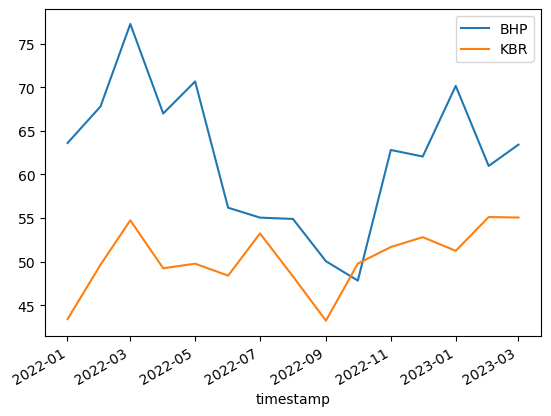

In [10]:
prices.plot()

In [11]:
# Calculate the daily returns using the closing prices and the PCT_change function
prices["BHP Actual Returns"]=prices["BHP"].pct_change()
prices["KBR Actual Returns"]=prices["KBR"].pct_change()
prices.tail()


,BHP,KBR,BHP Actual Returns,KBR Actual Returns
timestamp,,,,
2022-11-01 04:00:00+00:00,62.80,51.67,0.313258,0.038176
2022-12-01 05:00:00+00:00,62.05,52.80,-0.011943,0.021870
2023-01-01 05:00:00+00:00,70.15,51.23,0.130540,-0.029735
2023-02-01 05:00:00+00:00,60.97,55.11,-0.130862,0.075737
2023-03-01 05:00:00+00:00,63.41,55.05,0.040020,-0.001089


In [12]:
# Generate the Features and Target Sets

short_window=2
long_window=4
prices["BHP SMA_Fast"]=prices["BHP"].rolling(window=short_window).mean()
prices["KBR SMA_Fast"]=prices["KBR"].rolling(window=short_window).mean()
prices["BHP SMA_Slow"]=prices["BHP"].rolling(window=long_window).mean()
prices["KBR SMA_Slow"]=prices["KBR"].rolling(window=long_window).mean()
prices.head()

,BHP,KBR,BHP Actual Returns,KBR Actual Returns,BHP SMA_Fast,KBR SMA_Fast,BHP SMA_Slow,KBR SMA_Slow
timestamp,,,,,,,,
2022-01-01 05:00:00+00:00,63.60,43.40,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-01 05:00:00+00:00,67.79,49.64,0.065881,0.143779,65.695,46.520,NaN,NaN
2022-03-01 05:00:00+00:00,77.25,54.73,0.139549,0.102538,72.520,52.185,NaN,NaN
2022-04-01 04:00:00+00:00,66.98,49.23,-0.132945,-0.100493,72.115,51.980,68.905,49.25
2022-05-01 04:00:00+00:00,70.66,49.76,0.054942,0.010766,68.820,49.495,70.670,50.84


In [13]:
# drop Nans
prices=prices.dropna()

prices.head()


,BHP,KBR,BHP Actual Returns,KBR Actual Returns,BHP SMA_Fast,KBR SMA_Fast,BHP SMA_Slow,KBR SMA_Slow
timestamp,,,,,,,,
2022-04-01 04:00:00+00:00,66.98,49.23,-0.132945,-0.100493,72.115,51.980,68.9050,49.2500
2022-05-01 04:00:00+00:00,70.66,49.76,0.054942,0.010766,68.820,49.495,70.6700,50.8400
2022-06-01 04:00:00+00:00,56.18,48.39,-0.204925,-0.027532,63.420,49.075,67.7675,50.5275
2022-07-01 04:00:00+00:00,55.04,53.23,-0.020292,0.100021,55.610,50.810,62.2150,50.1525
2022-08-01 04:00:00+00:00,54.89,48.30,-0.002725,-0.092617,54.965,50.765,59.1925,49.9200


In [14]:
# Combine all the data together from team members into one dataframe concate
Luis_df=prices.drop(columns=["BHP", "KBR"]).copy()
Luis_df.head()


,BHP Actual Returns,KBR Actual Returns,BHP SMA_Fast,KBR SMA_Fast,BHP SMA_Slow,KBR SMA_Slow
timestamp,,,,,,
2022-04-01 04:00:00+00:00,-0.132945,-0.100493,72.115,51.980,68.9050,49.2500
2022-05-01 04:00:00+00:00,0.054942,0.010766,68.820,49.495,70.6700,50.8400
2022-06-01 04:00:00+00:00,-0.204925,-0.027532,63.420,49.075,67.7675,50.5275
2022-07-01 04:00:00+00:00,-0.020292,0.100021,55.610,50.810,62.2150,50.1525
2022-08-01 04:00:00+00:00,-0.002725,-0.092617,54.965,50.765,59.1925,49.9200


In [15]:
# Tracy's Data Frame

start_d = pd.Timestamp("2022-01-01", tz="America/New_York").isoformat()
end_d = pd.Timestamp("2023-03-31", tz="America/New_York").isoformat()

tickers = ["AXP", "RIO"]

timeframe = "1Month"

df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start = start_d,
    end = end_d
).df
df_portfolio.drop('trade_count', axis=1, inplace=True)
df_portfolio.drop('vwap', axis=1, inplace=True)

df_portfolio = df_portfolio.drop(columns=["open","high","low","volume"])
df_portfolio.head()


,close,symbol
timestamp,,
2022-01-01 05:00:00+00:00,179.82,AXP
2022-02-01 05:00:00+00:00,194.54,AXP
2022-03-01 05:00:00+00:00,187.00,AXP
2022-04-01 04:00:00+00:00,174.71,AXP
2022-05-01 04:00:00+00:00,168.82,AXP


In [16]:
AXP = df_portfolio[df_portfolio['symbol']=='AXP'].drop('symbol', axis=1)
RIO = df_portfolio[df_portfolio['symbol']=='RIO'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AXP, RIO], axis=1, join="inner")

# check for NaN values
df_portfolio.dropna()
df_portfolio.columns=["AXP","RIO"]
# Preview DataFrame
df_portfolio.head()

,AXP,RIO
timestamp,,
2022-01-01 05:00:00+00:00,179.82,71.40
2022-02-01 05:00:00+00:00,194.54,78.58
2022-03-01 05:00:00+00:00,187.00,80.40
2022-04-01 04:00:00+00:00,174.71,71.12
2022-05-01 04:00:00+00:00,168.82,73.44


In [17]:
# training_df = df_portfolio.loc["2022-01-01 05:00:00" : "2022-12-31 05:00:00"]
# training_df

In [18]:
# testing_df = df_portfolio.loc["2023-01-01 05:00:00" : "2023-03-31 04:00:00"]
# testing_df

<AxesSubplot:xlabel='timestamp'>

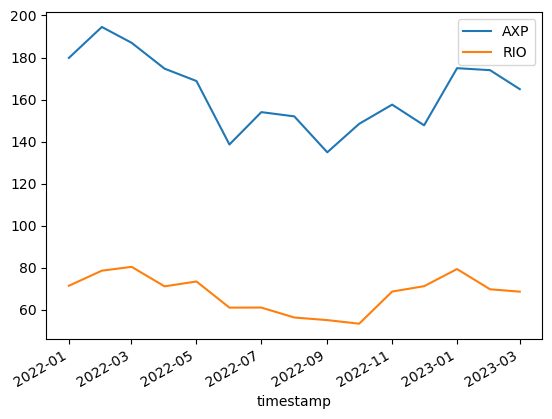

In [19]:
df_portfolio.plot()

In [20]:
df_portfolio["AXP Actual Returns"] = df_portfolio["AXP"].pct_change()
df_portfolio["RIO Actual Returns"] = df_portfolio["RIO"].pct_change()
df_portfolio.head()

,AXP,RIO,AXP Actual Returns,RIO Actual Returns
timestamp,,,,
2022-01-01 05:00:00+00:00,179.82,71.40,NaN,NaN
2022-02-01 05:00:00+00:00,194.54,78.58,0.081860,0.100560
2022-03-01 05:00:00+00:00,187.00,80.40,-0.038758,0.023161
2022-04-01 04:00:00+00:00,174.71,71.12,-0.065722,-0.115423
2022-05-01 04:00:00+00:00,168.82,73.44,-0.033713,0.032621


In [21]:
short_window = 2
long_window = 4
df_portfolio["AXP SMA_Fast"] = df_portfolio["AXP"].rolling(window=short_window).mean()
df_portfolio["RIO SMA_Fast"] = df_portfolio["RIO"].rolling(window=short_window).mean()
df_portfolio["AXP SMA_Slow"] = df_portfolio["AXP"].rolling(window=long_window).mean()
df_portfolio["RIO SMA_Slow"] = df_portfolio["RIO"].rolling(window=long_window).mean()

df_portfolio.dropna(inplace=True)

In [22]:
Tracy_df = df_portfolio.drop(columns=["AXP", "RIO"])
Tracy_df.head()

,AXP Actual Returns,RIO Actual Returns,AXP SMA_Fast,RIO SMA_Fast,AXP SMA_Slow,RIO SMA_Slow
timestamp,,,,,,
2022-04-01 04:00:00+00:00,-0.065722,-0.115423,180.855,75.760,184.0175,75.3750
2022-05-01 04:00:00+00:00,-0.033713,0.032621,171.765,72.280,181.2675,75.8850
2022-06-01 04:00:00+00:00,-0.178889,-0.169390,153.720,67.220,167.2875,71.4900
2022-07-01 04:00:00+00:00,0.111095,0.000492,146.320,61.015,159.0425,66.6475
2022-08-01 04:00:00+00:00,-0.013115,-0.077667,153.010,58.660,153.3650,62.9400


In [23]:
# Damien's Dataframe

ticker = ["TSLA", "AMZN"]

timeframe = "1month"

start_date = pd.Timestamp("2022-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-03-31", tz="America/New_York").isoformat()

In [24]:
 TSLA= api.get_bars(
    "TSLA",
    timeframe,
    start=start_date,
    end=end_date
).df

TSLA = pd.DataFrame(TSLA["close"])
TSLA.tail()

,close
timestamp,
2022-11-01 04:00:00+00:00,194.70
2022-12-01 05:00:00+00:00,123.18
2023-01-01 05:00:00+00:00,173.22
2023-02-01 05:00:00+00:00,205.71
2023-03-01 05:00:00+00:00,207.41


In [25]:
 AMZN= api.get_bars(
    "AMZN",
    timeframe,
    start=start_date,
    end=end_date
).df

AMZN = pd.DataFrame(AMZN["close"])
AMZN.head()

,close
timestamp,
2022-01-01 05:00:00+00:00,2991.47
2022-02-01 05:00:00+00:00,3071.26
2022-03-01 05:00:00+00:00,3259.95
2022-04-01 04:00:00+00:00,2485.63
2022-05-01 04:00:00+00:00,2404.19


In [26]:
price = pd.concat([AMZN, TSLA], axis=1, join="inner")
price.columns=ticker

price.head()

,TSLA,AMZN
timestamp,,
2022-01-01 05:00:00+00:00,2991.47,936.72
2022-02-01 05:00:00+00:00,3071.26,870.43
2022-03-01 05:00:00+00:00,3259.95,1077.60
2022-04-01 04:00:00+00:00,2485.63,870.76
2022-05-01 04:00:00+00:00,2404.19,758.01


<AxesSubplot:xlabel='timestamp'>

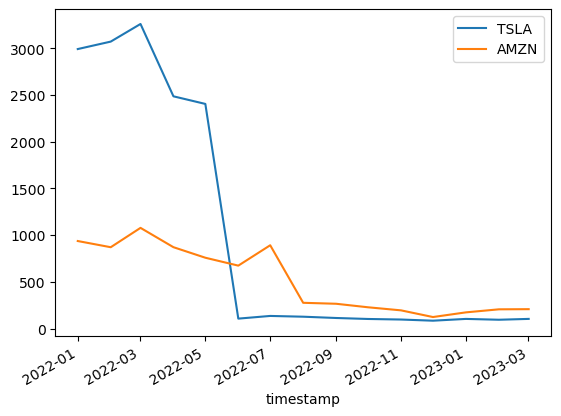

In [27]:
price.plot()

In [28]:
price["TSLA Actual Returns"]=price["TSLA"].pct_change()
price["AMZN Actual Returns"]=price["AMZN"].pct_change()
price.head()

,TSLA,AMZN,TSLA Actual Returns,AMZN Actual Returns
timestamp,,,,
2022-01-01 05:00:00+00:00,2991.47,936.72,NaN,NaN
2022-02-01 05:00:00+00:00,3071.26,870.43,0.026673,-0.070768
2022-03-01 05:00:00+00:00,3259.95,1077.60,0.061437,0.238009
2022-04-01 04:00:00+00:00,2485.63,870.76,-0.237525,-0.191945
2022-05-01 04:00:00+00:00,2404.19,758.01,-0.032764,-0.129485


In [29]:
short_window=2
long_window=4
price["TSLA SMA_Fast"]=price["TSLA"].rolling(window=short_window).mean()
price["AMZN SMA_Fast"]=price["AMZN"].rolling(window=short_window).mean()
price["TSLA SMA_Slow"]=price["TSLA"].rolling(window=long_window).mean()
price["AMZN SMA_Slow"]=price["AMZN"].rolling(window=long_window).mean()
price.head()

,TSLA,AMZN,TSLA Actual Returns,AMZN Actual Returns,TSLA SMA_Fast,AMZN SMA_Fast,TSLA SMA_Slow,AMZN SMA_Slow
timestamp,,,,,,,,
2022-01-01 05:00:00+00:00,2991.47,936.72,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-01 05:00:00+00:00,3071.26,870.43,0.026673,-0.070768,3031.365,903.575,NaN,NaN
2022-03-01 05:00:00+00:00,3259.95,1077.60,0.061437,0.238009,3165.605,974.015,NaN,NaN
2022-04-01 04:00:00+00:00,2485.63,870.76,-0.237525,-0.191945,2872.790,974.180,2952.0775,938.8775
2022-05-01 04:00:00+00:00,2404.19,758.01,-0.032764,-0.129485,2444.910,814.385,2805.2575,894.2000


In [30]:
price.dropna(inplace=True)
TSLA_shares=1
AMZN_shares=1

price.tail()

,TSLA,AMZN,TSLA Actual Returns,AMZN Actual Returns,TSLA SMA_Fast,AMZN SMA_Fast,TSLA SMA_Slow,AMZN SMA_Slow
timestamp,,,,,,,,
2022-11-01 04:00:00+00:00,96.54,194.70,-0.057595,-0.144326,99.490,211.120,109.6875,240.7750
2022-12-01 05:00:00+00:00,84.00,123.18,-0.129894,-0.367334,90.270,158.940,98.9950,202.6675
2023-01-01 05:00:00+00:00,103.13,173.22,0.227738,0.406235,93.565,148.200,96.5275,179.6600
2023-02-01 05:00:00+00:00,94.23,205.71,-0.086299,0.187565,98.680,189.465,94.4750,174.2025
2023-03-01 05:00:00+00:00,103.28,207.41,0.096042,0.008264,98.755,206.560,96.1600,177.3800


In [31]:
Damien_df = price.drop(columns=["AMZN", "TSLA"]).copy()
Damien_df.head()

,TSLA Actual Returns,AMZN Actual Returns,TSLA SMA_Fast,AMZN SMA_Fast,TSLA SMA_Slow,AMZN SMA_Slow
timestamp,,,,,,
2022-04-01 04:00:00+00:00,-0.237525,-0.191945,2872.79,974.180,2952.0775,938.8775
2022-05-01 04:00:00+00:00,-0.032764,-0.129485,2444.91,814.385,2805.2575,894.2000
2022-06-01 04:00:00+00:00,-0.955823,-0.111595,1255.20,715.715,2063.9950,844.9475
2022-07-01 04:00:00+00:00,0.270596,0.323765,120.58,782.435,1282.7450,798.4100
2022-08-01 04:00:00+00:00,-0.060615,-0.690830,130.86,583.530,693.0300,649.6225


In [32]:
Tracy_df.columns


Index(['AXP Actual Returns', 'RIO Actual Returns', 'AXP SMA_Fast',
       'RIO SMA_Fast', 'AXP SMA_Slow', 'RIO SMA_Slow'],
      dtype='object')

In [33]:
Luis_df.columns

Index(['BHP Actual Returns', 'KBR Actual Returns', 'BHP SMA_Fast',
       'KBR SMA_Fast', 'BHP SMA_Slow', 'KBR SMA_Slow'],
      dtype='object')

In [34]:

combined=pd.concat([Luis_df, Tracy_df, Damien_df], axis=1, join="inner")
combined.head()

,BHP Actual Returns,KBR Actual Returns,BHP SMA_Fast,KBR SMA_Fast,BHP SMA_Slow,KBR SMA_Slow,AXP Actual Returns,RIO Actual Returns,AXP SMA_Fast,RIO SMA_Fast,AXP SMA_Slow,RIO SMA_Slow,TSLA Actual Returns,AMZN Actual Returns,TSLA SMA_Fast,AMZN SMA_Fast,TSLA SMA_Slow,AMZN SMA_Slow
timestamp,,,,,,,,,,,,,,,,,,
2022-04-01 04:00:00+00:00,-0.132945,-0.100493,72.115,51.980,68.9050,49.2500,-0.065722,-0.115423,180.855,75.760,184.0175,75.3750,-0.237525,-0.191945,2872.79,974.180,2952.0775,938.8775
2022-05-01 04:00:00+00:00,0.054942,0.010766,68.820,49.495,70.6700,50.8400,-0.033713,0.032621,171.765,72.280,181.2675,75.8850,-0.032764,-0.129485,2444.91,814.385,2805.2575,894.2000
2022-06-01 04:00:00+00:00,-0.204925,-0.027532,63.420,49.075,67.7675,50.5275,-0.178889,-0.169390,153.720,67.220,167.2875,71.4900,-0.955823,-0.111595,1255.20,715.715,2063.9950,844.9475
2022-07-01 04:00:00+00:00,-0.020292,0.100021,55.610,50.810,62.2150,50.1525,0.111095,0.000492,146.320,61.015,159.0425,66.6475,0.270596,0.323765,120.58,782.435,1282.7450,798.4100
2022-08-01 04:00:00+00:00,-0.002725,-0.092617,54.965,50.765,59.1925,49.9200,-0.013115,-0.077667,153.010,58.660,153.3650,62.9400,-0.060615,-0.690830,130.86,583.530,693.0300,649.6225


In [35]:
portfolio={"BHP":1, "KBR":1, "AXP": 1, "RIO":1, "TSLA":10, "AMZN":10}
combined["Portfolio Return"]=(1+combined["BHP Actual Returns"].cumprod())*portfolio["BHP"]+(1+combined["KBR Actual Returns"].cumprod())*portfolio["KBR"]+(1+combined["AXP Actual Returns"].cumprod())*portfolio["AXP"]+(1+combined["RIO Actual Returns"].cumprod())*portfolio["RIO"]+(1+combined["TSLA Actual Returns"].cumprod())*portfolio["TSLA"]+(1+combined["AMZN Actual Returns"].cumprod())*portfolio["AMZN"]
combined.head()

,BHP Actual Returns,KBR Actual Returns,BHP SMA_Fast,KBR SMA_Fast,BHP SMA_Slow,KBR SMA_Slow,AXP Actual Returns,RIO Actual Returns,AXP SMA_Fast,RIO SMA_Fast,AXP SMA_Slow,RIO SMA_Slow,TSLA Actual Returns,AMZN Actual Returns,TSLA SMA_Fast,AMZN SMA_Fast,TSLA SMA_Slow,AMZN SMA_Slow,Portfolio Return
timestamp,,,,,,,,,,,,,,,,,,,
2022-04-01 04:00:00+00:00,-0.132945,-0.100493,72.115,51.980,68.9050,49.2500,-0.065722,-0.115423,180.855,75.760,184.0175,75.3750,-0.237525,-0.191945,2872.79,974.180,2952.0775,938.8775,5.155947
2022-05-01 04:00:00+00:00,0.054942,0.010766,68.820,49.495,70.6700,50.8400,-0.033713,0.032621,171.765,72.280,181.2675,75.8850,-0.032764,-0.129485,2444.91,814.385,2805.2575,894.2000,6.022701
2022-06-01 04:00:00+00:00,-0.204925,-0.027532,63.420,49.075,67.7675,50.5275,-0.178889,-0.169390,153.720,67.220,167.2875,71.4900,-0.955823,-0.111595,1255.20,715.715,2063.9950,844.9475,5.991556
2022-07-01 04:00:00+00:00,-0.020292,0.100021,55.610,50.810,62.2150,50.1525,0.111095,0.000492,146.320,61.015,159.0425,66.6475,0.270596,0.323765,120.58,782.435,1282.7450,798.4100,5.997018
2022-08-01 04:00:00+00:00,-0.002725,-0.092617,54.965,50.765,59.1925,49.9200,-0.013115,-0.077667,153.010,58.660,153.3650,62.9400,-0.060615,-0.690830,130.86,583.530,693.0300,649.6225,6.000743


In [36]:
X=combined[["BHP SMA_Fast", "BHP SMA_Slow", "KBR SMA_Fast", "KBR SMA_Slow", "AXP SMA_Fast", "AXP SMA_Slow", "RIO SMA_Fast", "RIO SMA_Slow", "TSLA SMA_Fast", "TSLA SMA_Slow", "AMZN SMA_Slow", "AMZN SMA_Fast"]]
X.head()

,BHP SMA_Fast,BHP SMA_Slow,KBR SMA_Fast,KBR SMA_Slow,AXP SMA_Fast,AXP SMA_Slow,RIO SMA_Fast,RIO SMA_Slow,TSLA SMA_Fast,TSLA SMA_Slow,AMZN SMA_Slow,AMZN SMA_Fast
timestamp,,,,,,,,,,,,
2022-04-01 04:00:00+00:00,72.115,68.9050,51.980,49.2500,180.855,184.0175,75.760,75.3750,2872.79,2952.0775,938.8775,974.180
2022-05-01 04:00:00+00:00,68.820,70.6700,49.495,50.8400,171.765,181.2675,72.280,75.8850,2444.91,2805.2575,894.2000,814.385
2022-06-01 04:00:00+00:00,63.420,67.7675,49.075,50.5275,153.720,167.2875,67.220,71.4900,1255.20,2063.9950,844.9475,715.715
2022-07-01 04:00:00+00:00,55.610,62.2150,50.810,50.1525,146.320,159.0425,61.015,66.6475,120.58,1282.7450,798.4100,782.435
2022-08-01 04:00:00+00:00,54.965,59.1925,50.765,49.9200,153.010,153.3650,58.660,62.9400,130.86,693.0300,649.6225,583.530


In [37]:
y=combined[["Portfolio Return"]]
y.head()

,Portfolio Return
timestamp,
2022-04-01 04:00:00+00:00,5.155947
2022-05-01 04:00:00+00:00,6.022701
2022-06-01 04:00:00+00:00,5.991556
2022-07-01 04:00:00+00:00,5.997018
2022-08-01 04:00:00+00:00,6.000743


In [38]:
# import libraries

import numpy as np

# import packages

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Split into training and testing windows

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.value_counts()


BHP SMA_Fast  BHP SMA_Slow  KBR SMA_Fast  KBR SMA_Slow  AXP SMA_Fast  AXP SMA_Slow  RIO SMA_Fast  RIO SMA_Slow  TSLA SMA_Fast  TSLA SMA_Slow  AMZN SMA_Slow  AMZN SMA_Fast
48.930        51.9475       46.495        48.6300       141.680       147.3450      54.205        56.4325       107.720        119.2900       414.9625       246.395          1
52.465        54.0375       45.760        48.2850       143.455       144.8875      55.675        58.3450       119.885        120.2325       526.4325       270.430          1
55.310        53.8875       50.720        48.2400       153.020       148.2375      60.995        58.3350       99.490         109.6875       240.7750       211.120          1
62.190        64.1450       55.080        53.5475       169.470       165.4050      69.165        72.2200       98.755         96.1600        177.3800       206.560          1
62.425        55.6775       52.235        49.3650       152.670       147.1750      69.920        62.0625       90.270       

In [39]:
y_train.value_counts()

Portfolio Return
5.155947            1
5.999963            1
5.999999            1
6.000000            1
6.000000            1
6.000000            1
6.000000            1
6.000005            1
6.022701            1
dtype: int64

In [40]:
y_train.shape

(9, 1)

In [41]:
scaler=StandardScaler()
X_scaler=scaler.fit(X_train)
X_train_scaled=X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

display(X_train_scaled)


array([[ 0.54781895,  0.54554449,  0.83339579,  1.32720882,  1.01913543,
         0.26147777,  0.88129787,  0.76931928, -0.53447378, -0.54343376,
        -0.83309772, -0.57731953],
       [ 0.99274651,  1.57122446, -0.44392422,  0.32031414,  0.81556014,
         1.52368934,  0.59696765,  1.2650442 ,  1.66212151,  1.80629543,
         1.64174199,  1.56664092],
       [-1.72185752, -1.30459631, -1.48663443, -0.8744441 , -1.45700486,
        -0.89502959, -1.67704505, -1.37328389, -0.52601032, -0.52192391,
        -0.00553595, -0.38200546],
       [ 1.4424509 ,  1.30011624,  0.41978741, -0.53926305,  1.50220185,
         1.71976796,  1.03478586,  1.19587328,  2.06271275,  1.93356025,
         1.79531149,  2.11486175],
       [-0.85110972, -1.00660767, -0.01815088, -1.08528379, -0.60040233,
        -0.83139316, -0.8227963 , -1.11524923, -0.53371544, -0.53024744,
        -0.60426878, -0.50302607],
       [ 0.0878785 ,  0.56896886,  1.49725463,  1.78402814,  0.6422001 ,
         0.3926722 ,  

In [42]:
X_train_scaled.shape

(9, 12)

In [43]:
type(y_train)

pandas.core.frame.DataFrame

In [44]:
# Using Machine Learning Into a Trading Strategy

# Import the SVM model
from sklearn import svm
from sklearn.metrics import classification_report


In [45]:
# Create the classifier or continuous model (SVC for classifier model and SVR for continuous model)
svm_model = svm.SVR()

# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
y_pred = svm_model.predict(X_test_scaled)

# Display the sample predictions
y_pred[:10]

c:\Users\luis.lu\Anaconda3\envs\alpacaenv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([6.04420434, 5.92183826, 5.91474213])

In [46]:
y_test[:10]

,Portfolio Return
timestamp,
2022-06-01 04:00:00+00:00,5.991556
2022-07-01 04:00:00+00:00,5.997018
2022-08-01 04:00:00+00:00,6.000743


In [47]:
y_pred=pd.DataFrame(y_pred)

In [48]:

y_pred=y_pred.set_index(X_test.index)
y_pred.columns=["Pred Return"]
display(y_pred.head())
display(y_test.head())

,Pred Return
timestamp,
2022-06-01 04:00:00+00:00,6.044204
2022-07-01 04:00:00+00:00,5.921838
2022-08-01 04:00:00+00:00,5.914742


,Portfolio Return
timestamp,
2022-06-01 04:00:00+00:00,5.991556
2022-07-01 04:00:00+00:00,5.997018
2022-08-01 04:00:00+00:00,6.000743


In [51]:
investment_return1=pd.concat([y_pred, y_test], axis="columns", join="inner")
investment_return1.head()

,Pred Return,Portfolio Return
timestamp,,
2022-06-01 04:00:00+00:00,6.044204,5.991556
2022-07-01 04:00:00+00:00,5.921838,5.997018
2022-08-01 04:00:00+00:00,5.914742,6.000743


<AxesSubplot:xlabel='timestamp'>

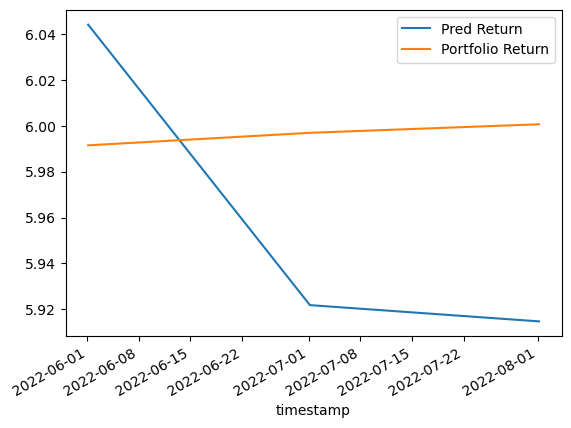

In [52]:
investment_return1.plot()

Backtesting a Machine Learning Trading Algorithm

Add a New Machine Learning Model Import neighbours model from sklearn

In [53]:
from sklearn.neighbors import KNeighborsRegressor
neigh=KNeighborsRegressor(n_neighbors=1)

In [54]:
neigh.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=1)

In [56]:
y_pred2=neigh.predict(X_test_scaled)
y_pred2=pd.DataFrame(y_pred2)
y_pred2=y_pred2.set_index(X_test.index)
y_pred2.columns=["Pred Return"]
y_pred2.head()


,Pred Return
timestamp,
2022-06-01 04:00:00+00:00,6.022701
2022-07-01 04:00:00+00:00,5.999999
2022-08-01 04:00:00+00:00,5.999999


In [57]:
investment_return2=pd.concat([y_pred2, y_test], axis=1, join="inner")
investment_return2.head()

,Pred Return,Portfolio Return
timestamp,,
2022-06-01 04:00:00+00:00,6.022701,5.991556
2022-07-01 04:00:00+00:00,5.999999,5.997018
2022-08-01 04:00:00+00:00,5.999999,6.000743


<AxesSubplot:xlabel='timestamp'>

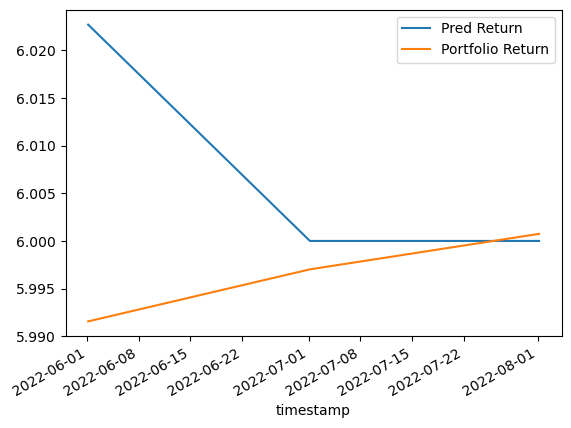

In [58]:
investment_return2.plot()